<a href="https://colab.research.google.com/github/FabricioMatosSIlva/FabricioMatosSIlva/blob/main/Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



#    Primeira Etapa: Carregamento das bases de dados

---

In [ ]:
#Importando algumas libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Carregando as bases de dados
citizen_demand = pd.read_csv("citizen_demand.csv", encoding="ISO-8859-1", sep=";")
category = pd.read_csv("category.csv", encoding="ISO-8859-1", sep=";")
entity = pd.read_excel("entity.xlsx")

### TIVE PROBLEMAS AO CARREGAR AS BASES *department.csv* e *services_rating.csv*. Abaixo a resolução que encontrei para carregar as bases nas variaveis.

In [ ]:
# Tentativa de leitura do arquivo CSV com diferentes codificações e separadores
# Isso garante que o pandas consiga abrir corretamente mesmo que o arquivo tenha problemas de acentuação ou formatação
# Primeiro tento com UTF-8 (padrão), depois ISO-8859-1 (latin1), e por fim troca o separador para ponto e vírgula, caso necessasrio
try:
    services_rating = pd.read_csv("services_rating.csv", encoding="utf-8", sep=",")
except UnicodeDecodeError:
    services_rating = pd.read_csv("services_rating.csv", encoding="ISO-8859-1", sep=",")
except pd.errors.ParserError:
    services_rating = pd.read_csv("services_rating.csv", encoding="ISO-8859-1", sep=";")

# Ver as 5 primeiras linhas
print(services_rating.head())

           id rating   user_id demand_code               created_at
0  M7aiyW5VCx      5  HJo6fESd      5fECvG    2024-12-11 15:19:12.7
1  4izu0axOqS      5  OGtikli8      KvACmK  2025-01-23 08:56:16.338
2  woNaWjX0ON      5  jGQlLgY3      mKTWt9  2024-09-13 19:33:06.142
3  X3UqPAZTF3      5  oclULROb      Rd78h2  2024-11-03 19:54:58.381
4  tVlbNBZG0G      5  Ff9rTVfV      W9tQfN   2024-09-21 08:11:37.62


In [ ]:
try:
    department = pd.read_csv("department.csv", encoding="utf-8", sep=",")
except UnicodeDecodeError:
    department = pd.read_csv("department.csv", encoding="ISO-8859-1", sep=",")
except pd.errors.ParserError:
    department = pd.read_csv("department.csv", encoding="ISO-8859-1", sep=";")

# Ver as 5 primeiras linhas
print(department.head())

   entity_id  idnum                                   entityBranchName
0       1054    154                              Secretaria de Fazenda
1       1054    155                                Secretaria de Saúde
2       1054    158                        Secretaria de Ordem Pública
3       1054    160                              Secretaria de Cultura
4       1054    161  Secretaria de Meio Ambiente, Recursos Hídricos...



#    Segunda etapa: Explorar a estrutura de cada bases

---



In [ ]:
# Visualiza as primeiras linhas de cada dataset
print("Citizen Demand:")
print(citizen_demand.head())

print("\n Entity (Prefeituras):")
print(entity.head())

print("\n Category (Categorias de Zeladoria):")
print(category.head())

print("\n Department (Departamentos):")
print(department.head())

print("\n Services Rating (Avaliações):")
print(services_rating.head())

Citizen Demand:
     code   status       type               created_at  \
0  Wn8BNv  FECHADO  App Colab    2024-12-11 15:19:12.7   
1  3ywoEG  FECHADO  App Colab  2025-02-25 12:36:40.937   
2  03eiQZ  FECHADO  App Colab  2025-01-23 08:56:16.338   
3  YlcP5h  FECHADO  App Colab  2024-07-08 14:29:25.864   
4  ORnFA0  FECHADO  App Colab  2025-01-10 15:20:02.618   

                   updated_at               closedDate  entity_id  \
0   2025-01-07 14:28:45.06261  2025-01-07 14:28:45.048       1054   
1  2025-02-26 13:07:27.994937  2025-02-26 13:07:27.979       1054   
2  2025-01-31 13:08:21.923511  2025-01-31 13:08:21.909       1054   
3  2024-12-09 14:41:12.547045  2024-12-09 14:41:12.535       1054   
4  2025-03-13 11:07:37.991845  2025-03-13 11:07:37.979       3569   

   category_id  entityBranchId deleted_at  
0        11674           162.0        NaN  
1        11079           162.0        NaN  
2         1727          1869.0        NaN  
3        11138          1208.0        NaN  



#    Terceira etapa: Verificar dados NaN e tipagens

---

In [ ]:
# Checar tipagem e valores Nan
# Verificação básica da estrutura de cada dataset:
# - .info() mostra os tipos de dados e quantidade de entradas não nulas
# - .isnull().sum() mostra quantos valores faltantes existem em cada coluna
# Isso ajuda a identificar colunas que precisam de tratamento antes da análise.
print("\n Verificação de nulos e tipos de dados:")
for df_name, df in zip(
    ['citizen_demand', 'entity', 'category', 'department', 'services_rating'],
    [citizen_demand, entity, category, department, services_rating]
):
    print(f"\n {df_name}:")
    print(df.info())
    print(df.isnull().sum())


 Verificação de nulos e tipos de dados:

 citizen_demand:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67028 entries, 0 to 67027
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   code            67028 non-null  object 
 1   status          67028 non-null  object 
 2   type            67028 non-null  object 
 3   created_at      67028 non-null  object 
 4   updated_at      67028 non-null  object 
 5   closedDate      38168 non-null  object 
 6   entity_id       67028 non-null  int64  
 7   category_id     67028 non-null  int64  
 8   entityBranchId  66981 non-null  float64
 9   deleted_at      185 non-null    object 
dtypes: float64(1), int64(2), object(7)
memory usage: 5.1+ MB
None
code                  0
status                0
type                  0
created_at            0
updated_at            0
closedDate        28860
entity_id             0
category_id           0
entityBranchId       47
deleted_a

In [ ]:
# Converter colunas de data para o formato datetime
citizen_demand["created_at"] = pd.to_datetime(citizen_demand["created_at"], errors='coerce')
citizen_demand["closedDate"] = pd.to_datetime(citizen_demand["closedDate"], errors='coerce')

# Criar coluna de tempo de resolução em dias
citizen_demand["tempo_resolucao"] = (citizen_demand["closedDate"] - citizen_demand["created_at"]).dt.days

# Filtrar apenas demandas válidasa
demandas_validas = citizen_demand[citizen_demand["deleted_at"].isna()]

# Conversão de datas e criação da coluna de tempo de resolução.
# Também removemos as demandas que foram deletadas pelo cidadão,
# pois essas não exigiram ação da prefeitura.

In [ ]:
# Agrupar dados por categorias
indicadores = (
    demandas_validas.groupby("category_id")
    .agg(
        total_demandas=("code", "count"),
        resolvidas=("status", lambda x: (x == "FECHADO").sum()),
        tempo_medio_resolucao=("tempo_resolucao", "mean")
    )
    .reset_index()
)

# Calcular taxa de resolução
indicadores["taxa_resolucao"] = indicadores["resolvidas"] / indicadores["total_demandas"]

# Juntar com o nome da categoria
indicadores = indicadores.merge(category[["id", "category"]], left_on="category_id", right_on="id")

# Agrupamento das demandas por categoria para calcular:
# - total de demandas
# - número de demandas resolvidas
# - tempo médio de resolução
# Depois, calculamos a taxa de resolução e juntamos com o nome da categoria.

In [ ]:
# Ordenar pelas categorias mais relevantes
recomendadas = indicadores.sort_values(
    by=["total_demandas", "taxa_resolucao"], ascending=[False, False]
).head(5)

print("5 Categorias recomendadas:")
print(recomendadas[["category", "total_demandas", "taxa_resolucao", "tempo_medio_resolucao"]])

# Selecionamos as 5 categorias com mais volume de demandas
# e melhor taxa de resolução para recomendar à nova prefeitura.

5 Categorias recomendadas:
                    category  total_demandas  taxa_resolucao  \
12   LÂMPADA APAGADA À NOITE            4271        0.795364   
78           Buraco nas vias            3095        0.515670   
148  LÂMPADA APAGADA À NOITE            2948        0.769335   
107           PODA DE ÁRVORE            1965        0.215776   
132          Buraco nas vias            1819        0.851017   

     tempo_medio_resolucao  
12               28.290513  
78               43.824937  
148              28.290394  
107              35.601415  
132              32.050518  


# Calcular nota média de avaliação por categoria

---



In [ ]:
# Garantir que a coluna de nota está em formato numérico
services_rating["rating"] = pd.to_numeric(services_rating["rating"], errors="coerce")

# Cruzar avaliações com demandas válidas para pegar o category_id
avaliacoes = services_rating.merge(
    demandas_validas[["code", "category_id"]],
    left_on="demand_code", right_on="code"
)

# Calcular a média das notas por categoria
avaliacoes_categoria = (
    avaliacoes.groupby("category_id")["rating"].mean().reset_index()
    .merge(category[["id", "category"]], left_on="category_id", right_on="id")
)

# Exibir ordenado por melhor avaliação
print("\n Nota média por categoria:")
print(avaliacoes_categoria.sort_values(by="rating", ascending=False))

# Convertendo a coluna 'rating' para numérico, ignorando erros (strings ou valores inválidos).
# Assim conseguimos calcular a média corretamente por categoria.


 Nota média por categoria:
     category_id  rating     id                              category
287        13499     5.0  13499  Publicidade irregular em via pública
285        13495     5.0  13495   PONTO RECORRENTE DE POLUIÇÃO SONORA
17          1695     5.0   1695                            Praia suja
261        13393     5.0  13393         Ônibus/trem/metrô superlotado
241        12683     5.0  12683       Academia das praças danificados
..           ...     ...    ...                                   ...
231        12669     1.0  12669                   Veículo abandonado 
221        12652     NaN  12652                       Bloqueio na Via
230        12667     NaN  12667           Foco de mosquito da dengue 
233        12671     NaN  12671               DESMATAMENTO IRREGULAR 
245        12802     NaN  12802                               NitBike

[313 rows x 4 columns]


In [ ]:
# Junta os indicadores de demanda com as notas médias por categoria
ranking = indicadores.merge(
    avaliacoes_categoria[["category_id", "rating"]],
    on="category_id",
    how="left"
)

In [ ]:
# Junta os indicadores de demanda com as notas médias por categoria
ranking = indicadores.merge(
    avaliacoes_categoria[["category_id", "rating"]],
    on="category_id",
    how="left"
)

In [ ]:
# Normalizar indicadores entre 0 e 1
ranking["score_demandas"] = ranking["total_demandas"] / ranking["total_demandas"].max()
ranking["score_resolucao"] = ranking["taxa_resolucao"]
ranking["score_avaliacao"] = ranking["rating"] / ranking["rating"].max()
ranking["score_tempo"] = 1 - (ranking["tempo_medio_resolucao"] / ranking["tempo_medio_resolucao"].max())

In [55]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
ranking[['score_demandas', 'score_resolucao', 'score_avaliacao', 'score_tempo']] = scaler.fit_transform(
    ranking[['score_demandas', 'score_resolucao', 'score_avaliacao', 'score_tempo']]
)

ranking['score_final'] = (
    ranking['score_demandas'] *
    ranking['score_resolucao'] *
    ranking['score_avaliacao'] *
    ranking['score_tempo']
)

In [56]:
recomendadas_final = ranking.sort_values(by="score_final", ascending=False).head(5)

print("\n 5 categorias recomendadas com base em múltiplos critérios:")
print(recomendadas_final[["category", "total_demandas", "taxa_resolucao", "tempo_medio_resolucao", "rating", "score_final"]])


 5 categorias recomendadas com base em múltiplos critérios:
                       category  total_demandas  taxa_resolucao  \
12      LÂMPADA APAGADA À NOITE            4271        0.795364   
150     LÂMPADA APAGADA À NOITE            2948        0.769335   
134             Buraco nas vias            1819        0.851017   
80              Buraco nas vias            3095        0.515670   
117  Descarte irregular de lixo            1011        0.851632   

     tempo_medio_resolucao    rating  score_final  
12               28.290513  3.782708     0.494246  
150              28.290394  3.880918     0.341593  
134              32.050518  3.916667     0.232245  
80               43.824937  3.822306     0.220039  
117              10.379270  3.943089     0.142409  


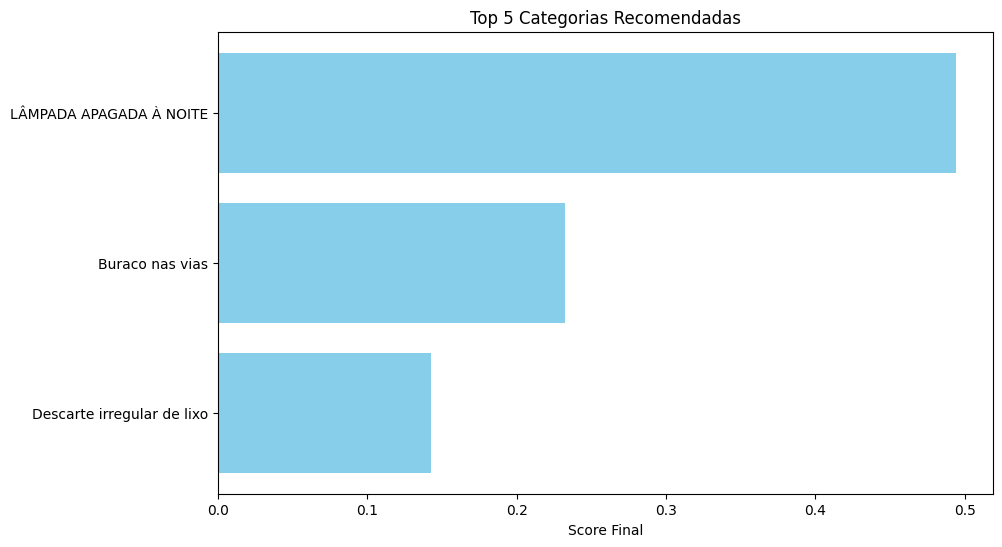

In [57]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(recomendadas_final["category"], recomendadas_final["score_final"], color='skyblue')
plt.xlabel("Score Final")
plt.title("Top 5 Categorias Recomendadas")
plt.gca().invert_yaxis()
plt.show()

In [54]:
recomendadas_final.to_csv("categorias_recomendadas.csv", index=False)